<a href="https://colab.research.google.com/github/Thanh-Phuc/Type-2-Diabetes-Stroke-prediction/blob/main/STROKE_Diabetes_fullmode_May24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecting to google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Import library**

In [ ]:
!pip install shap
!pip install imblearn
!pip install scikit-plot
!pip install tensorflow
!pip install keras
!pip install git+https://github.com/tensorflow/doc
!pip install --upgrade scikit-learn

!pip install tensorflow_docs
# print("GPU Available: ", tf.test.is_gpu_available())

## Tensorflow

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, GlobalAveragePooling1D
# from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
import tensorflow_docs as tfdocs
from tensorflow.keras.regularizers import l1, l2
import tensorflow_docs.modeling
import tensorflow_docs.plots

## Scikit learn

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score, roc_auc_score, precision_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.linear_model import Ridge, RidgeClassifierCV , RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.svm import SVR, SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy import interp
from matplotlib import pyplot as plt
from itertools import cycle, product
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

import statsmodels.api as sm
from patsy import dmatrices

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
!pip install shap
import shap
shap.initjs()
# Import necessary modules
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, auc, precision_recall_curve, classification_report, average_precision_score, roc_auc_score, precision_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.linear_model import Ridge, RidgeClassifierCV , RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.svm import SVR, SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from scipy import interp
from matplotlib import pyplot as plt
from itertools import cycle, product
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
import shap as shap
import statsmodels.api as sm
from patsy import dmatrices
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier



# **Import and process data**

## Import Sroke_5yr

In [ ]:
data_DIR = '/My Drive/PBHM PhD/ML predict T2DM/Data_0820/MACE'
# Read v_merged_PATT_first_diag_date data
in_file = data_DIR + '/chronic_dm_rx_all_cci_lab_atc4_MACE_5yr_ok.csv'
ds = pd.read_csv(in_file, sep=',', index_col=0)

In [ ]:
ds.columns

Index(['chr_no', 'hosp_grp', 'f_date', 'visit_no', 'fee_no', 'opd_dt',
       'gender', 'age', 'timeToRx', 'insulin_rx', 'biguanides_rx',
       'sulfonylureas_rx', 'agi_rx', 'thiazolidinediones_rx', 'dpp4_rx',
       'glp1_rx', 'sglt2_rx', 'others_rx', 'MACE_3P', 'timeToMACE', 'MI',
       'timeToMI', 'death', 'timeTodeath', 'Stroke', 'timeToStroke',
       'body_weight', 'body_high', 'bmi', 'dm_rx', 'pre_cvd', 'COPD',
       'rheumatic_disease', 'peptic_ulcer_disease', 'dementia', 'paralysis',
       'renal_disease', 'cancer', 'liver_disease', 'CCI_score', 'anemias',
       'depression', 'hyperlipidemia', 'hypertension', 'parkinson',
       'stroke_hist', 'alb', 'bun', 'chole', 'cre', 'ferr', 'gluAC', 'hba1',
       'hct', 'hgb', 'trig', 'hba1_ok', 'gluAC_ok', 'alb_ok', 'bun_ok',
       'cre_ok', 'ferr_ok', 'trig_ok', 'A02A_ANTACIDS', 'A02B_GORD',
       'A03_GASTROINTESTINAL_DISORDERS', 'A06_LAXATIVES',
       'B01A_ANTITHROMBOTIC', 'B03_ANTIANEMIC', 'C01_CARDIAC_THERAPY',
       'C

### Process Sroke_5yr

In [ ]:
#Select patients having insulin level = 0
ds_no_ins=ds[ds['insulin_rx']==0]

In [ ]:
#Select patients 40 year-olds and older
df=ds_no_ins[ds_no_ins['age']>=40]

In [ ]:
# percentage of null in every column
null_percentage = df.isnull().sum()/df.shape[0]*100
# list of columns having more than 80% null
col_to_drop = null_percentage[null_percentage>80].keys()
# drop columns had >80% of missing
df = df.drop(col_to_drop, axis=1)

df = df.drop(['chr_no', 'f_date', 'visit_no', 'fee_no', 'opd_dt','his_visit_no',
         'insulin_rx','biguanides_rx', 'sulfonylureas_rx', 'agi_rx', 'thiazolidinediones_rx',
        'dpp4_rx', 'glp1_rx', 'sglt2_rx', 'others_rx', 'body_weight', 'body_high',
         'timeToRx','timeToMACE','timeToMI','timeToStroke','timeTodeath',
                'hba1', 'gluAC', 'cre', 'trig'], axis=1)

# Replace 'hba1', 'gluAC', 'cre', 'trig' = 'hba1_ok','gluAC_ok', 'alb_ok', 'bun_ok', 'cre_ok', 'ferr_ok', 'trig_ok','hdl_ok', 'ldl_ok'

In [ ]:
df.columns

Index(['hosp_grp', 'gender', 'age', 'MACE_3P', 'MI', 'death', 'Stroke', 'bmi',
       'dm_rx', 'pre_cvd', 'COPD', 'rheumatic_disease', 'peptic_ulcer_disease',
       'dementia', 'paralysis', 'renal_disease', 'cancer', 'liver_disease',
       'CCI_score', 'anemias', 'depression', 'hyperlipidemia', 'hypertension',
       'parkinson', 'stroke_hist', 'chole', 'hba1_ok', 'gluAC_ok', 'cre_ok',
       'trig_ok', 'A02A_ANTACIDS', 'A02B_GORD',
       'A03_GASTROINTESTINAL_DISORDERS', 'A06_LAXATIVES',
       'B01A_ANTITHROMBOTIC', 'B03_ANTIANEMIC', 'C01_CARDIAC_THERAPY',
       'C02_ANTIHYPERTENSIVES', 'C03_DIURETICS', 'C07_BETA_BLOCKING',
       'C08_CALCIUM_CHANNEL_BLOCKERS', 'C09_RENIN_ANGIOTENSIN',
       'C10_LIPID_MODIFYING', 'D07_CORTICOSTEROIDS', 'M01_ANTIRHEUMATIC',
       'M04_ANTIGOUT', 'NERVOUS_SYSTEM_DRUGS', 'R06_ANTIHISTAMINES',
       'C04AD_PERIPHERAL_VASODILATORS', 'A05BA_LIVER_THERAPY',
       'G04CA_BENIGN_PROSTATIC_HYPERTROPHY', 'H02AB_CORTICOSTEROIDS',
       'H03AA_THYROID'

In [ ]:
df.rename(columns={  'gender': 'Sex', 'age':'Age', 'bmi':'BMI',
                   'pre_cvd': 'Pre_Cardiovasacular disease', 'rheumatic_disease':'Rheumatic_Disease', 'peptic_ulcer_disease':'Peptic_Ulcer_Disease',
                     'dementia':'Dementia', 'paralysis':'Paralysis', 'renal_disease':'Renal_Disease', 'cancer':'Cancer', 'liver_disease':'Liver_Disease',
                     'CCI_score':'CCI_score', 'anemias':'Anemias', 'depression':'Depression', 'hyperlipidemia':'Hyperlipidemia', 'hypertension':'Hypertension',
                    'parkinson': 'Parkinson' , 'dm_rx': 'Antidiabetic drug', 'cvd': 'Cardiovasacular disease',
                   'chole': 'Cholesterol', 'hba1_ok': 'HbA1c','gluAC_ok':'GlucoseAC', 'cre_ok':'Creatinine',
                   'trig_ok':'Triglyceride','hdl_ok':'High-Density Lipoprotein','ldl_ok':'Low-Density Lipoprotein',
                   'timeToRx':'DM duration','rheum':'Rheumatic disease', 'pud':'Peptic ulcer disease',
                   'renal':'Renal Disease', 'liver':'Liver Disease','lipid':'Hyperlipidemia ', 'ht':'Hypertension ',
                   'A02A_ANTACIDS':'Med_Antacids', 'A02B_GORD':'Med_Gord','A03_GASTROINTESTINAL_DISORDERS':'Med_Gastrointestinal_Disorders',
                   'A06_LAXATIVES':'Med_Laxatives', 'B01A_ANTITHROMBOTIC':'Med_Antithrombotic', 'B03_ANTIANEMIC':'Med_Antianemic',
                   'C01_CARDIAC_THERAPY': 'Cardiac_Therapy','C02_ANTIHYPERTENSIVES' : 'Med_Antihypertensives', 'C03_DIURETICS': 'Med_Diuretics',
                   'C07_BETA_BLOCKING':'Med_Beta_Blocking','C08_CALCIUM_CHANNEL_BLOCKERS': 'Med_Calcium_Channel_Blockers',
                   'C09_RENIN_ANGIOTENSIN':'Med_Renin_Angiotensin', 'C10_LIPID_MODIFYING':'Med_Lipid_Modifying',
                   'D07_CORTICOSTEROIDS':'Med_Corticosteroids_D07', 'M01_ANTIRHEUMATIC':'Med_Antirheumatic',
                   'M04_ANTIGOUT' : 'Med_Antigout', 'NERVOUS_SYSTEM_DRUGS':'Nervous_System_Drugs', 'R06_ANTIHISTAMINES':'Med_Antihistamines',
                   'C04AD_PERIPHERAL_VASODILATORS':'Med_Peripheral_Vasodilators', 'A05BA_LIVER_THERAPY' : 'Liver_Therapy',
                   'G04CA_BENIGN_PROSTATIC_HYPERTROPHY': 'Benign_Prostatic_Hypertrophy', 'H02AB_CORTICOSTEROIDS':'Med_Corticosteroids_H02AB',
                   'H03AA_THYROID':'Med_Thyroid'}, inplace=True)

In [ ]:
df=df.filter(['Age', 'BMI', 'Cholesterol', 'Triglyceride', 'Creatinine', 'GlucoseAC',
       'HbA1c', 'CCI_score', 'Antidiabetic drug', 'Sex', 'Med_Beta_Blocking',
       'Med_Lipid_Modifying', 'Nervous_System_Drugs', 'Hyperlipidemia',
       'Med_Calcium_Channel_Blockers', 'Cardiac_Therapy', 'stroke_hist',
       'Med_Renin_Angiotensin', 'Med_Antithrombotic', 'Med_Antigout','Stroke', 'hosp_grp'])

In [ ]:
#Split Train and test dataset
df_sh=df[df['hosp_grp']==0]
df_tmu=df[df['hosp_grp']!=0]

###Impute missing values with MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

# imputer=IterativeImputer(estimator=LinearRegression(),verbose=2,max_iter=30, tol=1e-10, imputation_order='roman')
# imputer=imputer.fit(np_Train_data)

# # Imputing the data
# X_train = imputer.transform(np_Train_data)
# X_test = imputer.transform(np_Test_data)

### Impute by Linear Regression

####Impute training dataset

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
# Define MICE Imputer
mice_imputer = IterativeImputer(estimator=LinearRegression(),verbose=2,max_iter=30, tol=1e-10, imputation_order='roman')

In [ ]:
# percentage of null in every column
null_percentage = df_tmu.isnull().sum()/df_tmu.shape[0]*100
# list of columns having missing
col_missing_tmu = null_percentage[null_percentage>0].keys()
col_missing_tmu
# create df with missing columns
df_tmu_mice = df_tmu.filter(col_missing_tmu, axis=1).copy()
# Fill missing value
df_tmu_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_tmu_mice), columns=df_tmu_mice.columns)
# Replace mising columns in ds1 by columns in df_mice
df_tmu[col_missing_tmu] = df_tmu_mice_imputed[col_missing_tmu].values

[IterativeImputer] Completing matrix with shape (492928, 6)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.38
[IterativeImputer] Change: 427.01406509615526, scaled tolerance: 5.876e-07 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.77
[IterativeImputer] Change: 169.55780411817136, scaled tolerance: 5.876e-07 
[IterativeImputer] Ending imputation round 3/30, elapsed time 1.15
[IterativeImputer] Change: 37.422675416918196, scaled tolerance: 5.876e-07 
[IterativeImputer] Ending imputation round 4/30, elapsed time 1.54
[IterativeImputer] Change: 15.768852140900396, scaled tolerance: 5.876e-07 
[IterativeImputer] Ending imputation round 5/30, elapsed time 1.92
[IterativeImputer] Change: 9.741828118858653, scaled tolerance: 5.876e-07 
[IterativeImputer] Ending imputation round 6/30, elapsed time 2.33
[IterativeImputer] Change: 6.355080620772421, scaled tolerance: 5.876e-07 
[IterativeImputer] Ending imputation round 7/30, elapsed time 2.74
[IterativeImputer

In [ ]:
np.sum(np.array(df_tmu) < 0, axis=0)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 274,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0])

In [ ]:

df_tmu=df_tmu.apply(lambda col: np.where(0>col, col.median(), col))

####Impute Testing dataset

In [ ]:
# percentage of null in every column
null_percentage = df_sh.isnull().sum()/df_sh.shape[0]*100
# list of columns having missing
col_missing_sh = null_percentage[null_percentage>0].keys()
col_missing_sh
# create df with missing columns
df_sh_mice = df_sh.filter(col_missing_sh, axis=1).copy()
# Fill missing value
df_sh_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_sh_mice), columns=df_sh_mice.columns)
# Replace mising columns in ds1 by columns in df_mice
df_sh[col_missing_sh] = df_sh_mice_imputed[col_missing_sh].values

[IterativeImputer] Completing matrix with shape (242135, 6)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.20
[IterativeImputer] Change: 289.26972803353414, scaled tolerance: 9.008e-07 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.40
[IterativeImputer] Change: 92.72059326867648, scaled tolerance: 9.008e-07 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.60
[IterativeImputer] Change: 34.43186861016805, scaled tolerance: 9.008e-07 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.79
[IterativeImputer] Change: 21.828832028174304, scaled tolerance: 9.008e-07 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.99
[IterativeImputer] Change: 11.22544728643328, scaled tolerance: 9.008e-07 
[IterativeImputer] Ending imputation round 6/30, elapsed time 1.19
[IterativeImputer] Change: 5.028947844469172, scaled tolerance: 9.008e-07 
[IterativeImputer] Ending imputation round 7/30, elapsed time 1.39
[IterativeImputer] 

In [ ]:
np.sum(np.array(df_sh) < 0, axis=0)

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df_sh=df_sh.apply(lambda col: np.where(0>col, col.median(), col))

## Variance Threshold

###Train test split

In [ ]:
print(np.sum(np.array(X_train) < 0, axis=0))

In [ ]:
y_train = df_tmu.Stroke
df_tmu.drop(['MACE_3P','MI', 'death', 'Stroke','hosp_grp'], axis=1, inplace=True)


y_test = df_sh.Stroke
df_sh.drop(['MACE_3P','MI', 'death', 'Stroke','hosp_grp'], axis=1, inplace=True)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.98
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(df_tmu)
var=df_tmu[df_tmu.columns[sel.get_support(indices=True)]].columns
var

Index(['Sex', 'Age', 'BMI', 'Antidiabetic drug', 'Pre_Cardiovasacular disease',
       'COPD', 'Peptic_Ulcer_Disease', 'Renal_Disease', 'Cancer',
       'Liver_Disease', 'CCI_score', 'Anemias', 'Depression', 'Hyperlipidemia',
       'Hypertension', 'stroke_hist', 'Cholesterol', 'HbA1c', 'GlucoseAC',
       'Creatinine', 'Triglyceride', 'Med_Antacids', 'Med_Gord',
       'Med_Laxatives', 'Med_Antithrombotic', 'Med_Antianemic',
       'Cardiac_Therapy', 'Med_Antihypertensives', 'Med_Diuretics',
       'Med_Beta_Blocking', 'Med_Calcium_Channel_Blockers',
       'Med_Renin_Angiotensin', 'Med_Lipid_Modifying', 'Med_Antirheumatic',
       'Med_Antigout', 'Nervous_System_Drugs', 'Med_Peripheral_Vasodilators',
       'Liver_Therapy', 'Benign_Prostatic_Hypertrophy', 'Med_Thyroid'],
      dtype='object')

In [ ]:
X_train = df_tmu[var]
X_test = df_sh[var]

In [ ]:
feature_name=X_train.columns

In [ ]:
# y_train, y_test = np_Train_outcome, np_Test_outcome
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('Train: Stroke: %d; Non-Stroke : %d' % (np.count_nonzero(y_train==1), np.count_nonzero(y_train==0)))
print('Test: Stroke: %d; Non-Stroke: %d' % (np.count_nonzero(y_test==1), np.count_nonzero(y_test==0)))

(492928, 40) (492928,)
(242135, 40) (242135,)
Train: Stroke: 1584; Non-Stroke : 491344
Test: Stroke: 1739; Non-Stroke: 240396


In [ ]:
neg, pos = np.bincount(y_train)
total = neg + pos
print('Train set:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
neg_test, pos_test = np.bincount(y_test)
total_test = neg_test + pos_test
print('Test set:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_test, pos_test, 100 * pos_test / total_test))

Train set:
    Total: 492928
    Positive: 1584 (0.32% of total)

Test set:
    Total: 242135
    Positive: 1739 (0.72% of total)



In [ ]:
X_train= X_train.to_numpy()
X_test= X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

###Feature importance

Age                             0.108
BMI                             0.089
Cholesterol                     0.076
Triglyceride                    0.075
Creatinine                      0.072
GlucoseAC                       0.067
HbA1c                           0.063
CCI_score                       0.045
Antidiabetic drug               0.038
Sex                             0.023
Med_Beta_Blocking               0.022
Med_Lipid_Modifying             0.021
Nervous_System_Drugs            0.021
Hyperlipidemia                  0.019
Med_Calcium_Channel_Blockers    0.019
Cardiac_Therapy                 0.018
stroke_hist                     0.017
Med_Renin_Angiotensin           0.016
Med_Antithrombotic              0.016
Med_Antigout                    0.016
dtype: float64


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

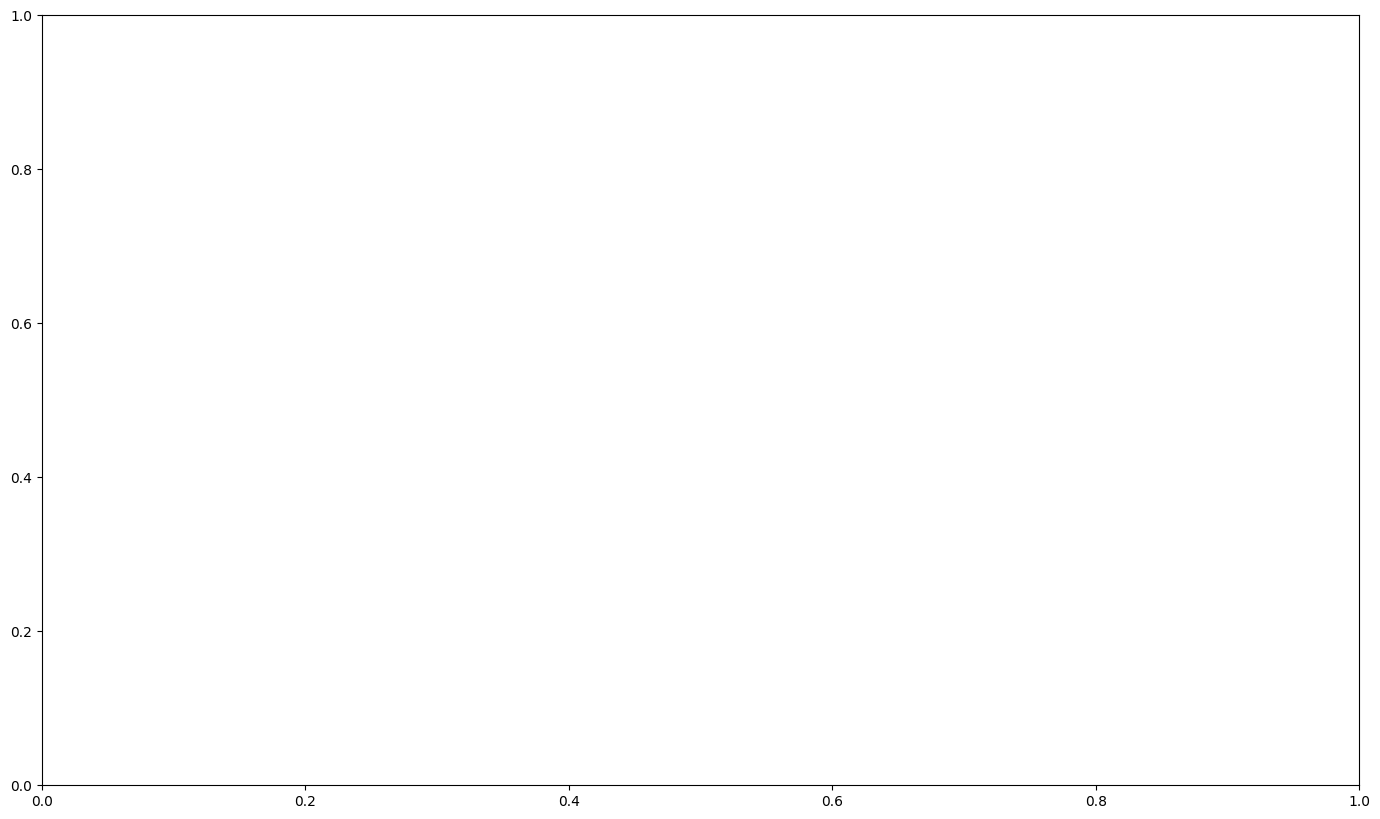

In [ ]:
rfModel=RandomForestClassifier(n_estimators=100)
rfFeature=rfModel.fit(X_train, y_train)
feature_scores = pd.Series(rfFeature.feature_importances_, index=feature_name).sort_values(ascending=False).head(20)
print(round(feature_scores,3))
f, ax = plt.subplots(figsize=(17, 10))
ax = sb.barplot(x=round(feature_scores,3), y=feature_scores.index,orient='h',order=feature_scores,palette="Blues_d",data=feature_scores)
ax.set_title("Random Forest feature importance", fontsize = 15)
#ax.set_xticklabels(round(feature_scores,3))
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()


In [ ]:
print(feature_scores.index)

Index(['Age', 'BMI', 'Cholesterol', 'Triglyceride', 'Creatinine', 'GlucoseAC',
       'HbA1c', 'CCI_score', 'Antidiabetic drug', 'Sex', 'Med_Beta_Blocking',
       'Med_Lipid_Modifying', 'Nervous_System_Drugs', 'Hyperlipidemia',
       'Med_Calcium_Channel_Blockers', 'Cardiac_Therapy', 'stroke_hist',
       'Med_Renin_Angiotensin', 'Med_Antithrombotic', 'Med_Antigout'],
      dtype='object')


# Model Development

## Define ROC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, f1_score
from scipy import interp

# Define a function to calculate metrics at the optimal threshold
def calculate_metrics_at_threshold(y_true, y_pred_prob, threshold):
    y_pred = y_pred_prob > threshold
    cm = confusion_matrix(y_true, y_pred)

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    npv = TN / (TN + FN)
    ppv = TP / (TP + FP)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)


    return accuracy, sensitivity, specificity, npv, ppv, f1_score

# Define a function to plot ROC curve
def plot_roc_curve(mean_fpr, mean_tpr, mean_auc, label):
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
    plt.plot(mean_fpr, mean_tpr, label='%s (AUC = %0.3f)' % (label, mean_auc), lw=2, alpha=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

## Set-up models

In [ ]:
classifiers = [

    # svm.SVC(gamma='auto', kernel='linear', probability=True),
    GradientBoostingClassifier(learning_rate= 0.1,
                               max_depth= 3,
                               n_estimators=50,
                               subsample= 0.7),
    lgb.LGBMClassifier(solver='lsqr',shrinkage=0 ),
    xgb.XGBClassifier(learning_rate=0.1,
                      max_depth= 3,
                      n_estimators= 50,
                      subsample= 0.7),
    LinearDiscriminantAnalysis (),
    LogisticRegression(C= 0.1,
                       class_weight= {1: 0.5, 0: 0.5},
                       penalty='l1',
                       solver='liblinear'),
    RandomForestClassifier(n_estimators=500,
                                max_depth=10,
                                min_samples_split=400,
                                random_state=12,
                                class_weight={0: 0.5,1: 0.5})
 ]


## Train the model

{'Classifiers': 'GradientBoostingClassifier', 'CrossVal_AUC': 0.9082933776525858, 'ExternalVal_AUC': 0.839173703909921, 'Accuracy': 0.7391950771263964, 'Sensitivity': 0.8159861989649224, 'Specificity': 0.7386395780295845, 'NPV': 0.998201095083368, 'PPV': 0.022085946862986195, 'F1-Score': 0.043007819603564285}
[LightGBM] [Warning] Unknown parameter: shrinkage
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: shrinkage
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Info] Number of positive: 1267, number of negative: 393075
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.140950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1871
[LightGBM] [Info] Number of data points in the train set: 394342, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003213 -> initscore=

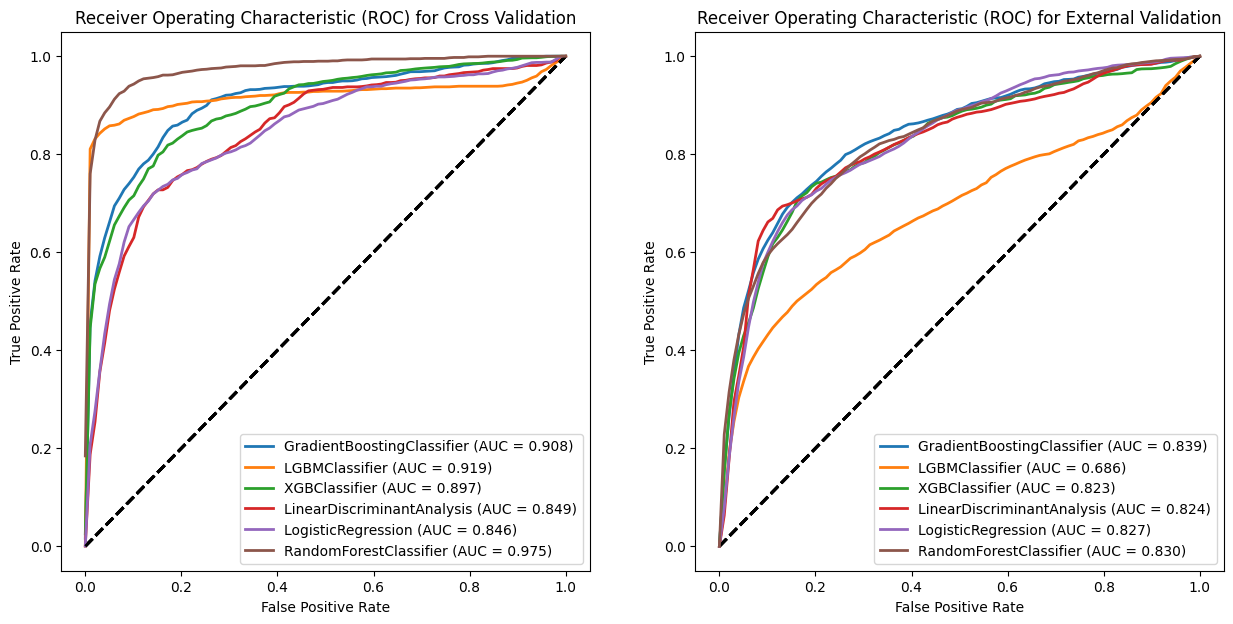

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
mean_fpr_cv = np.linspace(0, 1, 100)

# External validation
mean_fpr = np.linspace(0, 1, 100)

result_data = []  # Create an empty list to store data

for cls in classifiers:
    tprs_cv = []
    aucs_cv = []

    tprs = []
    aucs = []

    for train, test in kf.split(X_train, y_train):
        model = cls.fit(X_train[train], y_train[train])

        prediction = model.predict_proba(X_train[test])
        pred_ex = model.predict_proba(X_test)

        fpr_cv, tpr_cv, t_cv = roc_curve(y_train[test], prediction[:, 1])
        tprs_cv.append(interp(mean_fpr_cv, fpr_cv, tpr_cv))
        roc_auc_cv = auc(fpr_cv, tpr_cv)
        aucs_cv.append(roc_auc_cv)

        fpr, tpr, t = roc_curve(y_test, pred_ex[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        optimal_idx = np.argmax(tpr - fpr)
        threshold = t[optimal_idx]

    # Calculate metrics at the optimal threshold
    accuracy, sensitivity, specificity, npv, ppv, f1_score = calculate_metrics_at_threshold(y_test, pred_ex[:, 1], threshold)

    result_data.append({'Classifiers': cls.__class__.__name__,
                            'CrossVal_AUC': np.mean(aucs_cv), 'ExternalVal_AUC': np.mean(aucs),
                            'Accuracy': accuracy, 'Sensitivity': sensitivity,
                            'Specificity': specificity, 'NPV': npv, 'PPV': ppv, 'F1-Score': f1_score})
    for row in result_data:
        print (row)

    # Plot ROC curve for Cross Validation
    plt.subplot(121)
    plot_roc_curve(mean_fpr_cv, np.mean(tprs_cv, axis=0), np.mean(aucs_cv), cls.__class__.__name__)

    # Plot ROC curve for External Validation
    plt.subplot(122)
    plot_roc_curve(mean_fpr, np.mean(tprs, axis=0), np.mean(aucs), cls.__class__.__name__)


# Customize the plots
axes[0].set_title('Receiver Operating Characteristic (ROC) for Cross Validation')
axes[1].set_title('Receiver Operating Characteristic (ROC) for External Validation')

plt.show()
# fig.savefig(data_DIR+'/Results/ROC_CV_MACE_5yr.pdf')


In [ ]:
fig.savefig(data_DIR +'/ROC_Stroke_240124.pdf', dpi=300)


## Performance evaluation

In [ ]:
# Create a result table DataFrame
result_table_cv = pd.DataFrame(result_data)

# Display the result_table
result_table_cv.to_csv(data_DIR + '/report_table_Stroke_CV_5yr_240124.csv',encoding='utf-8', index=True)
result_table_cv

,Classifiers,CrossVal_AUC,ExternalVal_AUC,Accuracy,Sensitivity,Specificity,NPV,PPV,F1-Score
0,GradientBoostingClassifier,0.908293,0.839174,0.739195,0.815986,0.738640,0.998201,0.022086,0.043008
1,LGBMClassifier,0.919458,0.685642,0.843439,0.479586,0.846071,0.995570,0.022041,0.042146
2,XGBClassifier,0.896642,0.823431,0.822417,0.728005,0.823100,0.997615,0.028909,0.055610
3,LinearDiscriminantAnalysis,0.849221,0.823597,0.870870,0.696952,0.872128,0.997493,0.037932,0.071948
4,LogisticRegression,0.845940,0.826735,0.862783,0.670500,0.864174,0.997249,0.034479,0.065585
5,RandomForestClassifier,0.975234,0.829518,0.773250,0.725704,0.773594,0.997442,0.022662,0.043951


[LightGBM] [Warning] Unknown parameter: shrinkage
[LightGBM] [Warning] Unknown parameter: solver


Text(0.5, 1.0, 'Calibration plots')

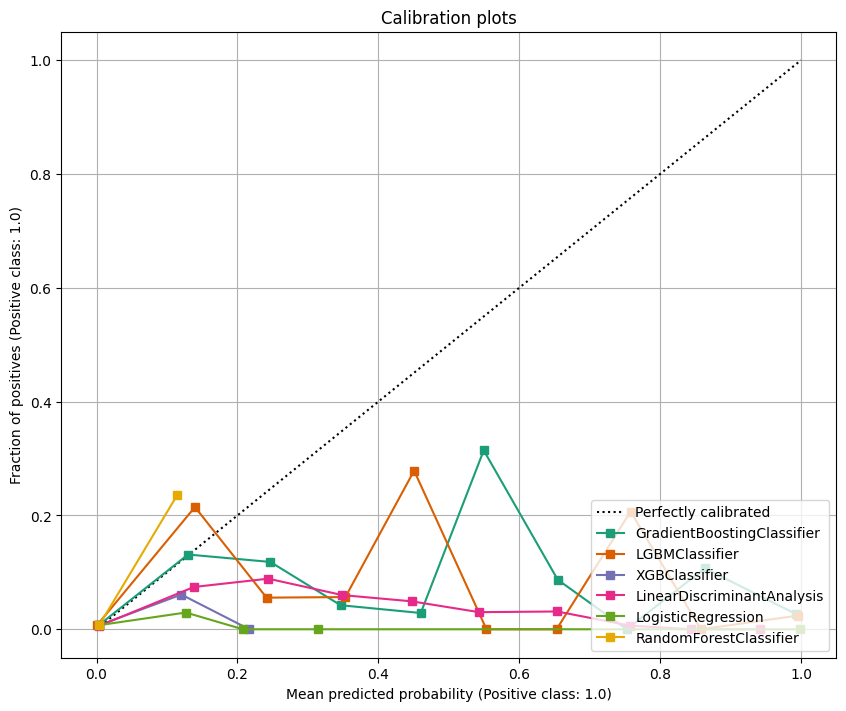

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(10, 17))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, clf in enumerate(classifiers):
    # clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[clf] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")
# fig.savefig(data_DIR+'/Cali_stroke_5yr_23103.pdf')

In [ ]:
fig.savefig(data_DIR +'/Cali_Stroke_240124.pdf', dpi=300)

In [ ]:
feature_name=var

# SHAPE feature importance

In [ ]:
!pip install shap
import shap

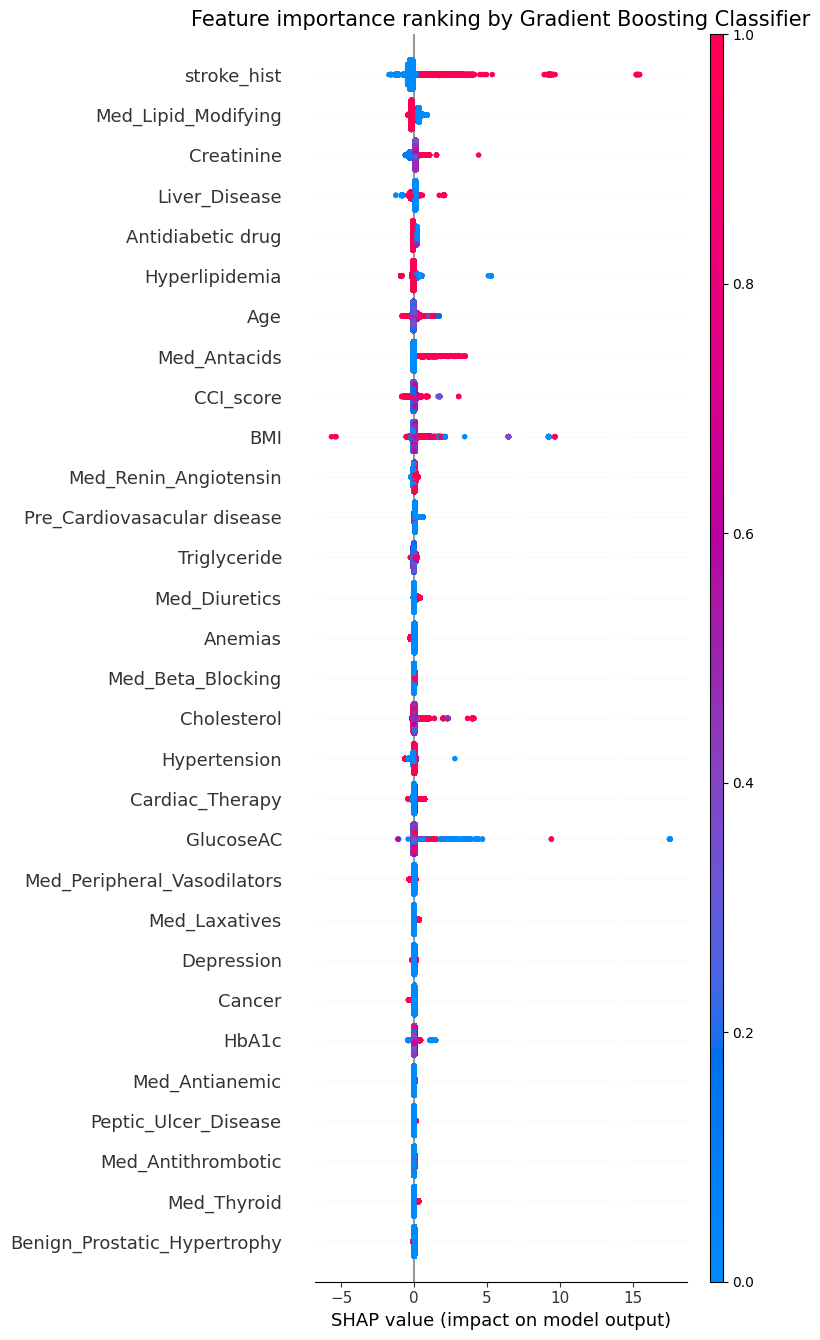

In [ ]:
# Get feature importances by LGBM


fig = plt.figure()

model =  GradientBoostingClassifier(learning_rate= 0.1,
                               max_depth= 3,
                               n_estimators=50,
                               subsample= 0.7).fit(X_train,y_train)
shap_values = shap.TreeExplainer(model).shap_values(X_train)
plt.title("Feature importance ranking by Gradient Boosting Classifier", fontsize=15)
shap.summary_plot(shap_values, X_train, feature_names=feature_name, show=False, color_bar=False,max_display=30)
# plt.gcf().axes[-1].set_aspect(100)
# plt.gcf().axes[-1].set_box_aspect(100)
plt.colorbar(aspect=100)
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig(data_DIR +'/SHAP_240124.pdf', dpi=300)

LIME explaination

In [ ]:
!pip install lime

In [ ]:
X_train_x = df_tmu[var]
X_test_x = df_sh[var]

In [ ]:
fig = plt.figure(figsize=(10, 17))

TypeError: 'Figure' object is not callable

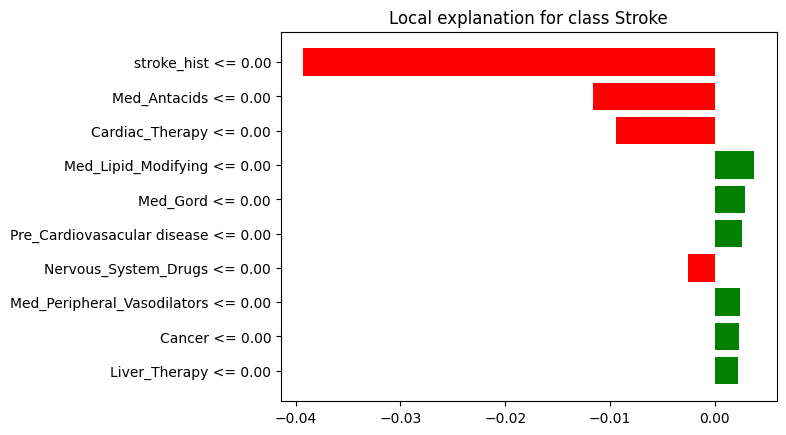

In [ ]:

# Get the class names
class_names = ['Non-Stroke', 'Stroke']

# Get the feature names
# feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train, feature_names = feature_name,
                                 class_names = class_names, mode = 'classification')

#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test_x.iloc[8], model.predict_proba)
# Show the explanation on the specified axes
explaination.show_in_notebook(show_table=True, show_all=False)
plt = explaination.as_pyplot_figure()
plt.show()


In [ ]:
fig.savefig(data_DIR +'/lime_report_240124.jpg', dpi=300)